<a href="https://colab.research.google.com/github/kwangwonland/kfq_ML_2023/blob/main/0619_%EB%B6%84%EB%A5%98%2C_%EC%95%99%EC%83%81%EB%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 결정트리
- 배깅: 전체 데이터 중 랜덤하게 같은 수로 여러 번 뽑아 학습 결과에 대한 통계를 냄

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn import tree

In [10]:
iris_data=load_iris()

In [11]:
x_train,x_test,y_train,y_test=train_test_split(iris_data.data,iris_data.target)

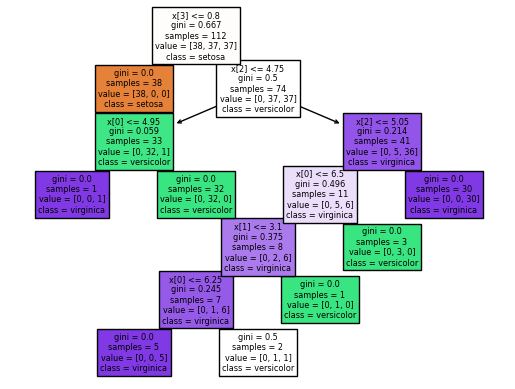

In [20]:
dtc=DecisionTreeClassifier(min_samples_split=5)
dtc.fit(x_train,y_train)
tree.plot_tree(dtc,filled=True,class_names=iris_data.target_names)
plt.show()

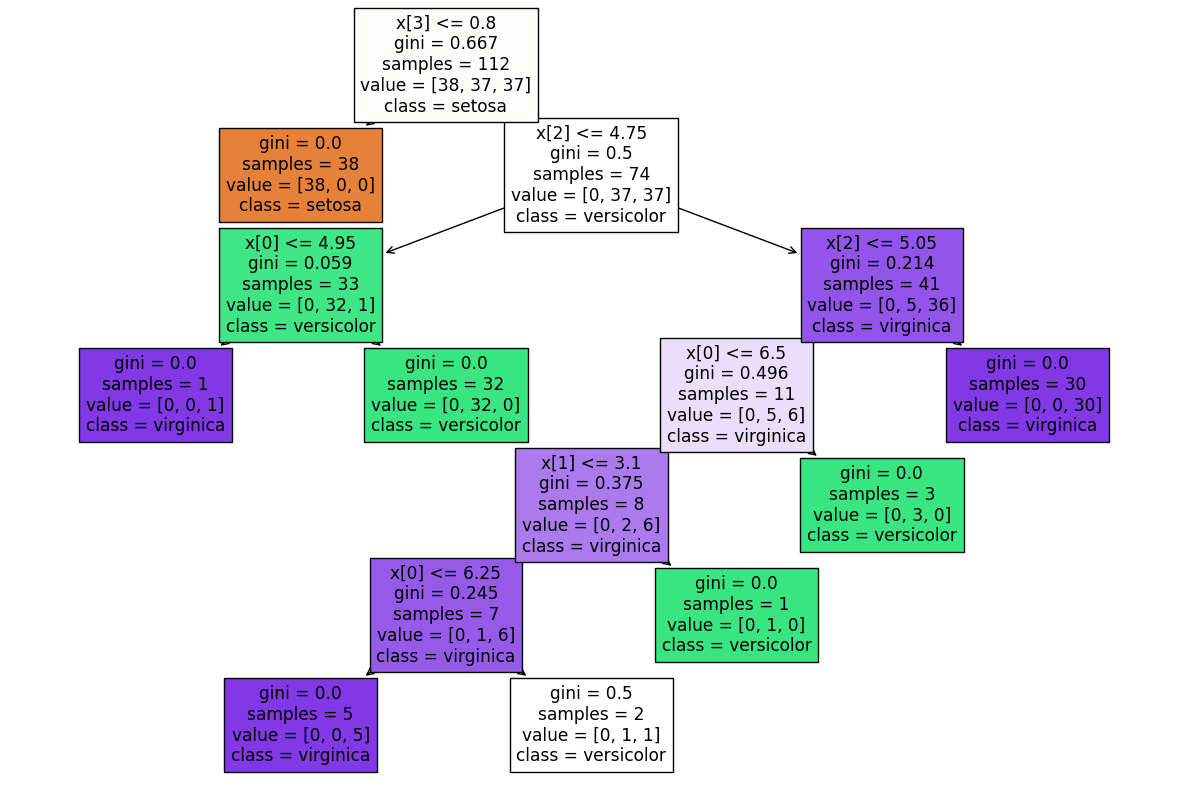

In [21]:
plt.figure(figsize=(15,10))
tree.plot_tree(dtc,filled=True,class_names=iris_data.target_names)
plt.show()

In [18]:
def gini2(datas):
    total=0
    for data in datas:
        total+=data
    s=0
    for data in datas:
        s+=(data/total)**2

    return 1-s

In [19]:
gini2([33,40,39])

0.6643813775510204

In [22]:
import seaborn as sns

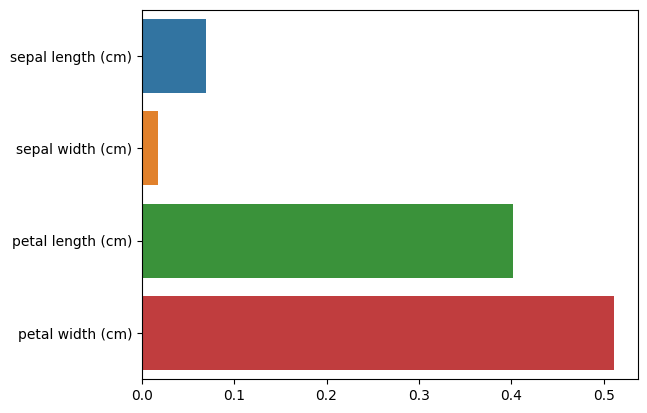

In [25]:
sns.barplot(x=dtc.feature_importances_,y=iris_data.feature_names)
plt.show()

In [26]:
from sklearn.datasets import make_classification

In [ ]:
dtc2=DecisionTreeClassifier(min_samples_split=5)

In [32]:
x_features, y_labels = make_classification(n_features=2,
                    n_redundant=0,
                    n_informative=2,
                    n_classes=3,
                    n_clusters_per_class=1)
x_features.shape,y_labels.shape

((100, 2), (100,))

In [33]:
def visualize_boundary(model, x, y):
    fig,ax = plt.subplots()
    ax.scatter(x[:, 0], x[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()

    model.fit(x, y)

    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),
                                np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)


In [34]:
path='/content/drive/MyDrive/python_basic/data/features.txt'

In [35]:
df=pd.read_csv(path,sep='\s+',header=None,names=['column_index','column_name'])
df.head()

,column_index,column_name
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y


# 앙상블

## voting

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd

In [43]:
cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data,columns=cancer.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [44]:
x_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target)

In [55]:
lr=LogisticRegression()
knn=KNeighborsClassifier()
vo=VotingClassifier(estimators=[('LR',lr),('KNN',knn)],voting='soft')
models=[lr,knn]
vo.fit(x_train,y_train)
pred1=vo.predict(x_test)
acc1=accuracy_score(y_test,pred1)
for model in models:
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    print(model.__class__.__name__,'===')
    print('acc',accuracy_score(y_test,pred))
print(acc1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression ===
acc 0.958041958041958
KNeighborsClassifier ===
acc 0.951048951048951
0.951048951048951


In [47]:
vo.fit(x_train,y_train)
pred=vo.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [48]:
print('acc:',accuracy_score(y_test,pred))

acc: 0.951048951048951


In [56]:
from sklearn.preprocessing import StandardScaler

In [58]:
ss=StandardScaler()
ss.fit(cancer.data)
scaled_data=ss.transform(cancer.data)
x_train,x_test,y_train,y_test=train_test_split(scaled_data,cancer.target)

In [61]:
vo=VotingClassifier(estimators=[('LR',lr),('KNN',knn)],voting='soft')
vo.fit(x_train,y_train)
pred=vo.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.9790209790209791


## 배깅-랜덤포레스트
- n_job=-1  -> 사용하는 컴퓨터의 cpu를 최대한 사용해주세요

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [63]:
dir_path='/content/drive/MyDrive/python_basic/data/UHD/'

In [64]:
df = pd.read_csv(dir_path+'features.txt',sep='\s+',
                        header=None,names=['column_index','column_name'])
feature_dup_df = pd.DataFrame(data=df.groupby('column_name').cumcount(),
                                  columns=['dup_cnt'])
feature_dup_df = feature_dup_df.reset_index()
ndf = pd.merge(df.reset_index(), feature_dup_df, how='outer')
ndf['column_name'] = ndf[['column_name', 'dup_cnt']].apply(lambda x : x[0]+'_'+str(x[1])
                                                                if x[1] >0 else x[0] ,  axis=1)
ndf = ndf.drop(['index'], axis=1)
feature_name = ndf.iloc[:, 1].values.tolist()
x_train = pd.read_csv(dir_path+'train/X_train.txt',sep='\s+', names=feature_name )
x_test = pd.read_csv(dir_path+'test/X_test.txt',sep='\s+', names=feature_name)
y_train = pd.read_csv(dir_path+'train/y_train.txt',sep='\s+',header=None,names=['action'])
y_test = pd.read_csv(dir_path+'test/y_test.txt',sep='\s+',header=None,names=['action'])

In [66]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred=rf.predict(x_test)
print('acc:',accuracy_score(y_test,pred))

<ipython-input-66-ec27a3a0c987>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


acc: 0.9311163895486936


In [67]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
print('acc:',accuracy_score(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


acc: 0.9015948422124194


In [69]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('acc:',accuracy_score(y_test,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


acc: 0.9579233118425518


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [70]:
ss = StandardScaler()
ss.fit(x_train)
scaled_xtr = ss.transform(x_train)
scaled_xte = ss.transform(x_test)

In [71]:
rf = RandomForestClassifier()
lr = LogisticRegression()
knn = KNeighborsClassifier()
models=[rf,lr,knn]
for model in models:
  model.fit(scaled_xtr,y_train)
  pred = model.predict(scaled_xte)
  print(model.__class__.__name__,"===")
  print("acc:",accuracy_score(y_test,pred))


<ipython-input-71-241f14e26a87>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(scaled_xtr,y_train)


RandomForestClassifier ===
acc: 0.9253478113335596


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usin

LogisticRegression ===
acc: 0.9541907024092298
KNeighborsClassifier ===
acc: 0.8802171700033933


In [72]:
from sklearn.model_selection import GridSearchCV

In [80]:
params={
    'max_depth':[4,8,12.16,20],
    'min_samples_leaf':[1,4,10,15],
    'min_samples_split':[2,4,6,8,12]
}

In [ ]:
rf=RandomForestClassifier(n_jobs=-1)
gs=GridSearchCV(rf,param_grid=params)
gs.fit(x_train,y_train)


In [83]:
print('best:',gs.best_params_)
print('best acc:',gs.best_score_)

best: {'max_depth': 20, 'min_samples_leaf': 10, 'min_samples_split': 8}
best acc: 0.9268265837946327


In [84]:
model=gs.best_estimator_

In [85]:
pred=model.predict(x_test)

In [86]:
print('acc:',accuracy_score(y_test,pred))

acc: 0.9209365456396336


In [87]:
sd=pd.Series(model.feature_importances_)
sd.index=x_train.columns

In [88]:
sd

tBodyAcc-mean()-X                       0.000108
tBodyAcc-mean()-Y                       0.000081
tBodyAcc-mean()-Z                       0.000030
tBodyAcc-std()-X                        0.006437
tBodyAcc-std()-Y                        0.000091
                                          ...   
angle(tBodyGyroMean,gravityMean)        0.000220
angle(tBodyGyroJerkMean,gravityMean)    0.000203
angle(X,gravityMean)                    0.027763
angle(Y,gravityMean)                    0.033715
angle(Z,gravityMean)                    0.014313
Length: 561, dtype: float64

In [89]:
top20=sd.sort_values(ascending=False)[:20]

In [91]:
top20

tGravityAcc-mean()-X               0.035275
angle(Y,gravityMean)               0.033715
tGravityAcc-energy()-X             0.031675
tGravityAcc-min()-X                0.030873
angle(X,gravityMean)               0.027763
tGravityAcc-min()-Y                0.025953
tGravityAcc-mean()-Y               0.025358
tGravityAcc-max()-Y                0.023922
tGravityAcc-max()-X                0.018785
fBodyAccJerk-bandsEnergy()-1,24    0.014780
angle(Z,gravityMean)               0.014313
fBodyAccJerk-bandsEnergy()-1,8     0.013187
tGravityAcc-mean()-Z               0.012645
tGravityAcc-energy()-Y             0.012398
tGravityAcc-max()-Z                0.011486
tBodyAccMag-std()                  0.011105
tGravityAcc-min()-Z                0.010964
fBodyAcc-mad()-X                   0.010820
tGravityAcc-arCoeff()-Z,1          0.009933
fBodyAcc-bandsEnergy()-1,16        0.009694
dtype: float64

In [92]:
import matplotlib.pyplot as plt

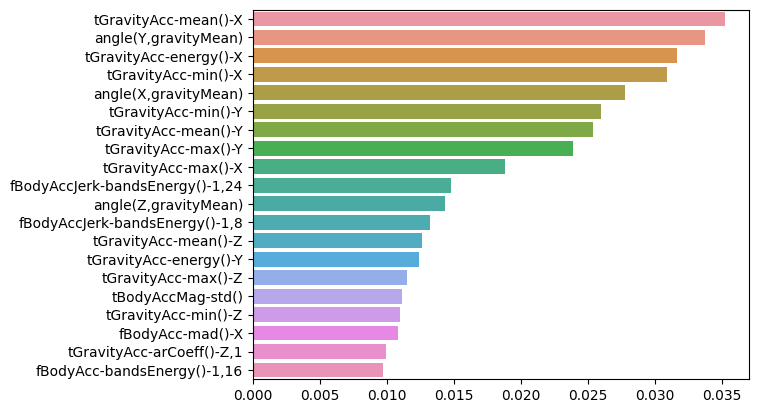

In [93]:
sns.barplot(x=top20,y=top20.index)
plt.show()